In [1]:
import numpy as np
from PIL import Image
from util import *
import matplotlib.pyplot as plt
import IPython.display
import copy
import textwrap

# Lista 6 (11 pkt.)

## Zadanie 1 (1 pkt.)

Wczytaj obrazek **miki.png**

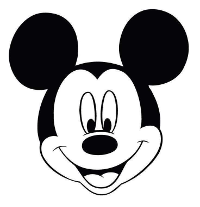

In [2]:
def dec2bin(dec_str, pad):
    return format(int(dec_str), '0' + str(pad) + 'b')


img = Image.open('miki.png')
arr = np.array(img).ravel()
arr_bin = [dec2bin(d, pad='8') for d in arr]
bits = ''.join(arr_bin)
img

i zaszyfruj go za pomocą DESa z kluczem:

In [3]:
key = '0111101000001010110010000001010101111111100000000000101000110001'

stosując szyfrowanie blok po bloku, czyli tak jak na liście 3., tzn. w trybie ECB. Schemat szyfrowania:

<img src="ECB_encryption.png" width="1000" align="left"/>

oraz deszyfrowania:

<img src="ECB_decryption.png" width="1000" align="left"/>

Wyświetl zaszyfrowany obrazek.

In [4]:
def encode():
    encoded = []
    sub_msg = textwrap.wrap(bits, 64)
    sub_keys = key_schedule(key)

    for i in range(len(sub_msg)):
        encoded.append(DES(sub_msg[i], sub_keys))
    return encoded

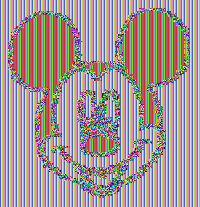

In [5]:
def split_img(img_bin, n):
    img_split = []
    for i in range(0, len(img_bin), n):
        img_split.append(img_bin[i:i + n])
    return img_split


img_t = ''.join(encode())
#img_t to ciąg bitów po zaszyfrowaniu
img = np.array([bin2dec(b) for b in split_img(img_t, 8)]).reshape(np.array(img).shape)
Image.fromarray(np.uint8(np.array(img)))

Mimo zaszyfrowania łatwo rozpoznać co było na obrazku.

## Zadanie 2 (2 pkt.)

Zaimplementuj tryb szyfrowania CBC.

<img src="CBC_encryption.png" width="1000" align="left"/>

In [6]:
def CBC(msg, key, iv):
    cbc_encoded = []
    sub_keys = key_schedule(key)
    sub_msg = textwrap.wrap(msg, 64)

    for i in range(len(sub_msg)):
        new_msg = xor(iv, sub_msg[i])
        cbc_encoded.append(DES(new_msg, sub_keys))
        iv = cbc_encoded[i]

    return ''.join(cbc_encoded)

In [7]:
#key to zmienna z poprzedniego zadania
iv = '0011111111001100000111011100110100100101010100000111010001000110'
msg = '1000110001101011011101110010100111101111101100111100001010100001011111110100000100100000111011001011000001011100110111101111110100000000100101011101110010000000110011011100000111000110011100111000010111111111011111000110001010101001101111110000010110011011'
print(CBC(msg, key,
          iv) == '1111101000110001101111001100101101011001101010001101010101100111011001100111010011001011100001001111011000001111110010011110011101010000101011010011011100011110011011001011100100011100011001011101110011110001110100010111001100100010111101011111101010111000')

True


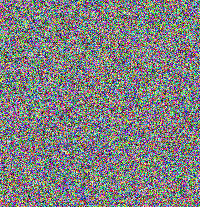

In [8]:
bits = ''.join([dec2bin(d, pad='8') for d in arr])

img_t = ''.join(CBC(bits, key, iv))
img = np.array([bin2dec(b) for b in split_img(img_t, 8)]).reshape(np.array(img).shape)
Image.fromarray(np.uint8(np.array(img)))

Zaszyfruj obrazek z zadania 1. za pomocą DESa w trybie CBC, zaszyfrowany obrazek wyświetl i zobacz czy nadal widoczna jest na nim Myszka Miki.

## Zadanie 3 (1 pkt.)

Zaimplementuj deszyfrację w trybi CBC. Zdeszyfruj zaszyfrowany w poprzednim zadaniu obrazek i sprawdź czy otrzymałeś pierwotny obrazek.

<img src="CBC_decryption.png" width="1000" align="left"/>

In [9]:
def CBCde(msg, key, iv):
    cbc_decoded = []
    sub_keys = key_schedule(key)
    sub_msg = textwrap.wrap(msg, 64)

    for i in range(len(sub_msg)):
        new_msg = DES(sub_msg[i], sub_keys[::-1])
        cbc_decoded.append(xor(iv, new_msg))
        iv = sub_msg[i]

    return ''.join(cbc_decoded)

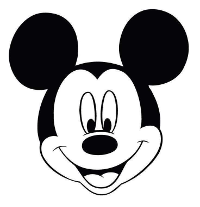

In [10]:
arr = np.array(img).ravel()
bits = ''.join([dec2bin(d, pad='8') for d in arr])

decoded_mickey = CBCde(bits, key, iv)

img_t = ''.join(decoded_mickey)
img = np.array([bin2dec(b) for b in split_img(img_t, 8)]).reshape(np.array(img).shape)
Image.fromarray(np.uint8(np.array(img)))

## Zadanie 4 (2 pkt.)

Zaimplementuj tryb OFB. W tym trybie zarówno szyfracja jak i deszyfracja odbywają się za pomocą dokładnie tego samego algorytmu.

<img src="OFB_encryption.png" width="1000" align="left"/>

In [11]:
def OFB(msg, key, iv):
    ofb_encoded = []
    sub_keys = key_schedule(key)
    sub_msg = textwrap.wrap(msg, 64)

    for i in range(len(sub_msg)):
        new_msg = DES(iv, sub_keys)
        ofb_encoded.append(xor(sub_msg[i], new_msg))
        iv = new_msg

    return ''.join(ofb_encoded)

In [12]:
print(OFB(msg, key,
          iv) == '1100001001010001100110011101011100100011010101010111010010010011100101001100010001000100011110101011011101001110000000111000111101000101101111011100001111001100110010101110100110111000111000001100110010110101111101101100101110001010111011111110101100110000')

True


In [13]:
print(OFB(OFB(msg, key, iv), key, iv) == msg)

True


## Zadanie 5 (1 pkt.)

Zaimmplementuj funkcję dodającą do wiadomości padding zgodnie z standardem PKCS#5. Wiadomości będą zapisywane w postaci tablicy bajtów zapisanych szesnastkowo. Funkcja ma przyjmować jako argumenty wiadomość oraz długość bloku do jakiego wiadomość ma być dopełniona.

In [14]:
def padding(msg, L):
    pass

In [15]:
print(padding(['ed', 'd2', '76', 'dc', '2b', 'd6', 'ff', 'a6', '35', '35', 'be', '1a', '26'], 16) ==
      ['ed', 'd2', '76', 'dc', '2b', 'd6', 'ff', 'a6', '35', '35', 'be', '1a', '26', '03', '03', '03'])
print(padding(['54', '10', '38', 'c0', 'cc', 'e7', '8d', '8f', '70', '22'], 16) ==
      ['54', '10', '38', 'c0', 'cc', 'e7', '8d', '8f', '70', '22', '06', '06', '06', '06', '06', '06'])
print(padding(
    ['8e', 'ba', 'e3', 'd9', '76', '08', 'f1', 'd2', 'ca', '09', '39', '6b', 'b0', '4d', '36', '94', '49', '69', '30',
     '57', '3e', '9d', 'df', 'd7', 'fa', 'aa', '95', '5c', '60', '5f'], 16) ==
      ['8e', 'ba', 'e3', 'd9', '76', '08', 'f1', 'd2', 'ca', '09', '39', '6b', 'b0', '4d', '36', '94', '49', '69', '30',
       '57', '3e', '9d', 'df', 'd7', 'fa', 'aa', '95', '5c', '60', '5f', '02', '02'])
print(padding(['1e', '17', '53', '69'], 8) ==
      ['1e', '17', '53', '69', '04', '04', '04', '04'])
print(padding(['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18'], 8) ==
      ['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18', '04', '04', '04', '04'])
print(padding(['1e', '17', '53', '69', '01', 'r2', 'ff', '1g'], 8) ==
      ['1e', '17', '53', '69', '01', 'r2', 'ff', '1g', '08', '08', '08', '08', '08', '08', '08', '08'])

False
False
False
False
False
False


## Zadanie 6 (2 pkt.)

Zaimplementuj wyrocznię, która sprawdza czy podana wiadomość ma prawidłowy padding i zwraca **False** lub **True**.

In [16]:
def oracle(msg, L):
    pass

In [17]:
print(oracle(['ed', 'd2', '76', 'dc', '2b', 'd6', 'ff', 'a6', '35', '35', 'be', '1a', '26', '03', '03', '03'],
             16) == True)
print(oracle(['54', '10', '38', 'c0', 'cc', 'e7', '8d', '8f', '70', '22', 'aa', '06', '06', '06', '06', '06'],
             16) == False)
print(oracle(
    ['8e', 'ba', 'e3', 'd9', '76', '08', 'f1', 'd2', 'ca', '09', '39', '6b', 'b0', '4d', '36', '94', '49', '69', '30',
     '57', '3e', '9d', 'df', 'd7', 'fa', 'aa', '95', '5c', '60', '5f', '02', '02'], 16) == True)
print(oracle(['1e', '17', '53', '04', '04', '04', '04', '04'], 8) == True)
print(oracle(['1e', '17', '53', '04', '04', '04', '04', '00'], 8) == False)
print(oracle(['1e', '17', '53', '04', '04', '04', '04', 'aa'], 8) == False)
print(
    oracle(['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18', '04', '04', '04', '04'], 8) == True)
print(oracle(['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18', '04', '00', '04', '04'],
             8) == False)
print(
    oracle(['1e', '17', '53', '69', '01', 'r2', 'ff', '1g', '08', '08', '08', '08', '08', '08', '08', '08'], 8) == True)

False
False
False
False
False
False
False
False
False


## Zadanie 7 (2 pkt.)

Zmienna **msg_enc** zawiera zaszyfrowaną wiadomość, w trybie CBC, z wektorem inicjującym **iv** oraz nieznanym kluczem. Funkcja server przyjmuje zaszyfrowaną wiadomość oraz wektor **iv**, odszyfrowywuje ją i sprawdza padding zwracając czy jest on poprawny. Korzystając z wartości logicznych zwracanych przez tą funkcję (tylko z nich, zakładamy, że nie mamy dostępu do klucza zawertego w tej funkcji ani do wyniku deszyfracji), przeprowadź atak typu padding oracle i zdeszyfruj wiadomość.

In [18]:
msg_enc = ['be', '21', 'a2', 'd7', '9d', 'c7', '8d', 'a3']
iv = ['36', '92', '8b', '53', 'ef', 'f2', '7a', 'e4']

In [19]:
def msgbin_to_msghex(msg):
    return [format(int(a, 2), '02x') for a in [msg[8 * i:8 * i + 8] for i in range(8)]]

In [20]:
def msghex_to_msgbin(msg):
    return ''.join([format(int(i, 16), '08b') for i in msg])

In [21]:
def server(msg_enc, iv):
    key = '0111101000001010110010000001010101111111100000000000101000110001'
    msg = CBCde(msghex_to_msgbin(msg_enc), key, msghex_to_msgbin(iv))
    return oracle(msgbin_to_msghex(msg), 8)